# **Atmospheric Dynamics: HW2 on Passive Tracer Advection**

###(2d) Numerically integrate the equation from part (b) to test your intuition about the evolution of the blob under different flow states.

###Equation from part (b):

###$\frac{\partial{\psi}}{\partial{t}}=-U\frac{\partial{\psi}}{\partial{x}}$ where $\psi(x, t=0)=\psi_0(x)$.

###Estimate the time tendencies and spatial derivatives using:

$\frac{\partial{\psi_{j}^{i}}}{\partial{t}}=\frac{\psi_{j}^{i+1}-\psi_{j}^{i}}{\Delta{t}}$

###and

$\frac{\partial{\psi_{j}^{i}}}{\partial{x}}=\frac{\psi_{j}^{i}-\psi_{j-1}^{i}}{\Delta{x}}$

###where i=time stamp and j=spatial location.

###By rearanging the first equation, we get forward (explcit) Euler's:
$\psi_{j}^{i+1}=\psi_{j}^{i}+\frac{\partial{\psi_{j}^{i}}}{\partial{t}}\Delta{t}$.

###Thus, I will:

###(1) Use backward difference to approximate $\frac{d\psi}{dx}$

###(2) Use the PDE from part (b) to get $\frac{d\psi}{dt}$

###(3) Use forward Euler's method to numerically integrate for $\psi$

###(4) Plot using:
* t in [0, 2, 4, 6, ...22]
* U = 1
* Λ = 0.10
* ∆t = 0.01
* ∆x = 0.10
* $\psi_0=exp(-\frac{(x-\mu)^2}{2\sigma^2})$ where $\mu=5$ and $\sigma=1$.

###(5) Then repeat with part (d) equation

In [73]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# specified variables
t_int = np.arange(0, 22.01, 0.01) # use dt
t_plot_con = np.arange(0, 2400, 200) # conversion for plotting every 2 seconds
t_plot = np.arange(0, 24, 2) # time step to plot every two seconds
x_int = np.arange(0, 50.1, 0.1)  # large enough grid
U = 1
lam = 0.1
dt = 0.01
dx = 0.1

In [75]:
# Gaussian pulse
sigma = 1
mu = 5
def Gaus(x, mu=5, sigma=1):
  return np.exp(-((x-mu)**2)/(2*(sigma**2)))

In [76]:
# empty array to hold solutions
psi = np.zeros([len(t_int), len(x_int)])

In [77]:
# When t=0, the density is the Gaussian of x:
psi[0] = Gaus(x_int)

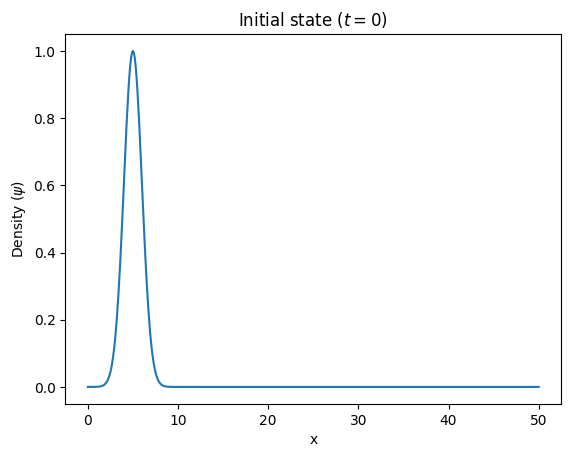

In [78]:
# plot initial state
plt.plot(x_int, psi[0])
plt.xlabel('x')
plt.ylabel('Density ($\psi$)')
plt.title('Initial state ($t=0$)');

In [79]:
def spat_der(time_ind):
  dpsi_dx = np.zeros(len(x_int))
  for j in range(1, len(x_int)):
    dpsi_dx[j] = (psi[time_ind][j] - psi[time_ind][j-1])/dx
  return dpsi_dx

In [80]:
for i in range(len(t_int) - 1):
  # get spatial derivative
  dpsi_dx = spat_der(i)

  # get time derivative
  dpsi_dt = -U*dpsi_dx

  # use forward Eulers method to compute next state
  psi[i+1] = psi[i] + dt*dpsi_dt

<ipython-input-81-7f6e2e59d112>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(['0','','','','','22'])


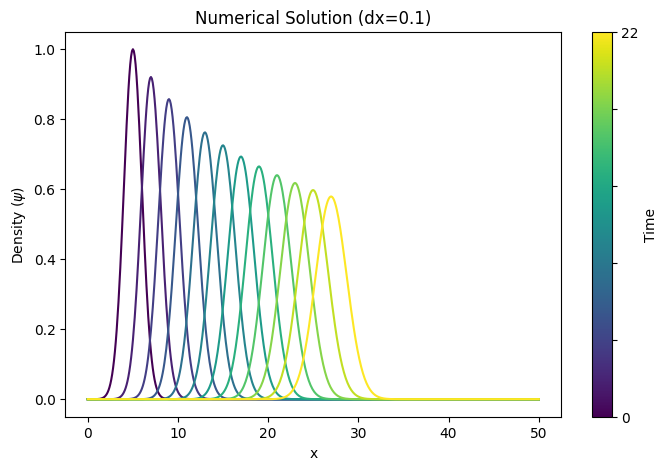

In [81]:
# plot numerical solution
cmap = plt.cm.viridis
sm = plt.cm.ScalarMappable(cmap=cmap)
fig, ax = plt.subplots(figsize=(8, 5))

# only display curves at 2 second intervals
for i in t_plot_con:
  ax.plot(x_int, psi[i], color=cmap(i/len(t_int)))
cb = fig.colorbar(mappable=sm, ax=ax, cmap=cmap, label='Time')
cb.set_ticklabels(['0','','','','','22'])
ax.set_xlabel('x')
ax.set_ylabel('Density ($\psi$)')
ax.set_title('Numerical Solution (dx=0.1)');

### Although it is properly moving to the right at a constant velocity, the density should not be decreasing. This discrepancy is from the error in the numerical approximation.

<ipython-input-89-b2fdb9a7940b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(['0','','','','','22'])


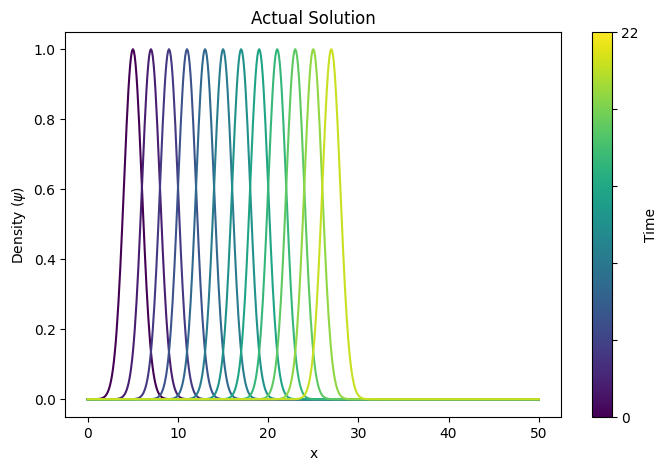

In [89]:
# plot actual solution
cmap = plt.cm.viridis
sm = plt.cm.ScalarMappable(cmap=cmap)
fig, ax = plt.subplots(figsize=(8, 5))

for t in t_plot:
  ax.plot(x_int, Gaus(x_int - U*t), color=cmap(t/24))
cb = fig.colorbar(mappable=sm, ax=ax, cmap=cmap, label='Time')
cb.set_ticklabels(['0','','','','','22'])
ax.set_xlabel('x')
ax.set_ylabel('Density ($\psi$)')
ax.set_title('Actual Solution');

### Now, I'll numerically integrate the equation from part (c).

### Equation from part (c):
$\frac{\partial{\psi}}{\partial{t}}=-\Lambda(\psi+x\frac{\partial{\psi}}{\partial{x}})$ where $\psi(x, t=0)=\psi_0(x)$ and $x\geq0$.

In [83]:
def x_spat_der(time_ind):
  x_dpsi_dx = np.zeros(len(x_int))
  for j in range(1, len(x_int)):
    x_dpsi_dx[j] = x_int[j]*(psi[time_ind][j] - psi[time_ind][j-1])/dx
  return x_dpsi_dx

In [84]:
for i in range(len(t_int) - 1):
  # get spatial derivative
  x_dpsi_dx = x_spat_der(i)

  # get time derivative
  dpsi_dt = -lam*(psi[i] + x_dpsi_dx)

  # use Eulers method to compute next state
  psi[i+1] = psi[i] + dt*dpsi_dt

<ipython-input-85-ea4ca0ca4370>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(['0','','','','','22']);


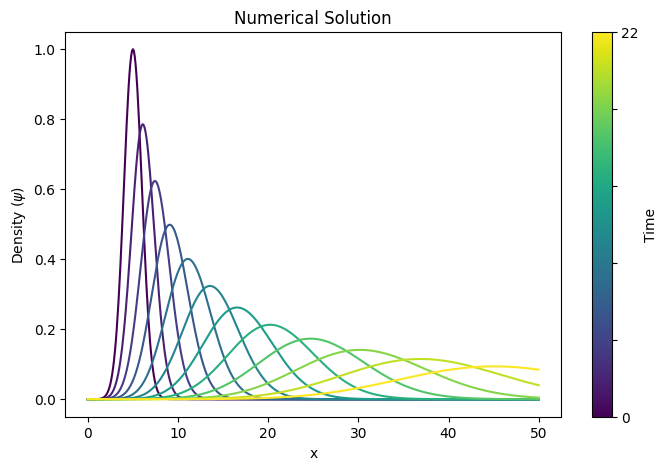

In [85]:
# plot numerical solution
cmap = plt.cm.viridis
sm = plt.cm.ScalarMappable(cmap=cmap)
fig, ax = plt.subplots(figsize=(8, 5))

# only display curves at 2 second intervals
for i in t_plot_con:
  ax.plot(x_int, psi[i], color=cmap(i/len(t_int)))
cb = fig.colorbar(mappable=sm, ax=ax, cmap=cmap, label='Time');
cb.set_ticklabels(['0','','','','','22']);
ax.set_xlabel('x')
ax.set_ylabel('Density ($\psi$)')
ax.set_title('Numerical Solution');